### 데이터 분석 기본 - 모델 최적화와 특징 선택
  ▶ 특성 선택과 엔지니어링 <br>
  ▶ 하이퍼 파라미터 튜닝(Hyperparametre Tuning) 이해

[학습 목표]
 - 모델의 최적화 특징 생성 등의 방법을 통한 성능 개선에 대해서 이해해 봅니다.
 - 특성 선택과 엔지니어링에 대해 이해해 봅니다.

### (1) 특성 선택과 엔지니어링 개념 이해

```
(1) 특성 엔지니어링이란?
특성 엔지니어링(Feature Engineering)은 기계 학습 모델의 성능을 향상시키기 위해 데이터의 특성(Feature)을 변형하거나 새로운 특성을 생성하는 과정을 말합니다.
데이터를 분석하고, 모델링하기 전에 수행하는 이 과정은 모델이 데이터를 더 잘 이해하고, 예측을 더 정확하게 할 수 있도록 도와줍니다.


(2) 특성 엔지니어링의 주요 목표
  A. 모델의 정확도 향상: 더 많은 정보를 포함하는 특성을 제공함으로써 모델의 예측 성능을 개선합니다.
  B. 모델 학습 속도 증가: 관련 없거나 중복된 특성을 제거하여 모델 학습 시간을 단축시킵니다.
  C. 이해하기 쉬운 결과 도출: 중요한 특성만을 포함시켜 모델의 해석을 용이하게 합니다.

(3) 특성 엔지니어링의 예시
  A. 결측치 처리: 데이터 내에서 결측치를 대체하거나 제거합니다. 결측치 처리 방법으로는 평균값 대체, 중앙값 대체, 최빈값 대체, 예측 모델 사용 등이 있습니다.
  B. 범주형 데이터 변환: 레이블 인코딩, 원-핫 인코딩 등을 통해 텍스트 데이터를 숫자 형태로 변환합니다.
  C. 수치 데이터 변환: 로그 변환, 스케일링(표준화, 정규화) 등을 통해 수치 데이터의 범위를 조정하거나 분포의 왜곡을 줄입니다.
  D. 날짜 및 시간 데이터 처리: 날짜에서 요일, 월, 분기 등을 추출하여 새로운 특성으로 사용합니다.
  E. 텍스트 데이터 처리: 자연어 처리를 통해 텍스트에서 유의미한 키워드나 구를 추출하거나, 텍스트를 벡터로 변환합니다.
  F. 다항 특성 및 상호작용 특성 생성: 기존 특성들의 조합을 통해 새로운 특성을 생성합니다.
```

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Seaborn 라이브러리를 사용해 데이터셋 로드
diamonds = sns.load_dataset("diamonds")

# LabelEncoder 인스턴스 생성
label_encoder_cut = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_clarity = LabelEncoder()

# 각 범주형 컬럼에 대해 레이블 인코딩 수행
diamonds['cut'] = label_encoder_cut.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder_color.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder_clarity.fit_transform(diamonds['clarity'])

diamonds


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [53]:
X = diamonds.drop('cut', axis=1)  # 'cut'을 제외한 모든 특성 사용
y = diamonds['cut']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정트리를 사용한 모델 구축
model = DecisionTreeClassifier(max_depth=7, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74


In [54]:
# 특성 중요도 평가
importances = model.feature_importances_

# 특성 중요도 출력
features = X.columns
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.3f}")

carat: 0.000
color: 0.000
clarity: 0.003
depth: 0.419
table: 0.515
price: 0.016
x: 0.028
y: 0.017
z: 0.001


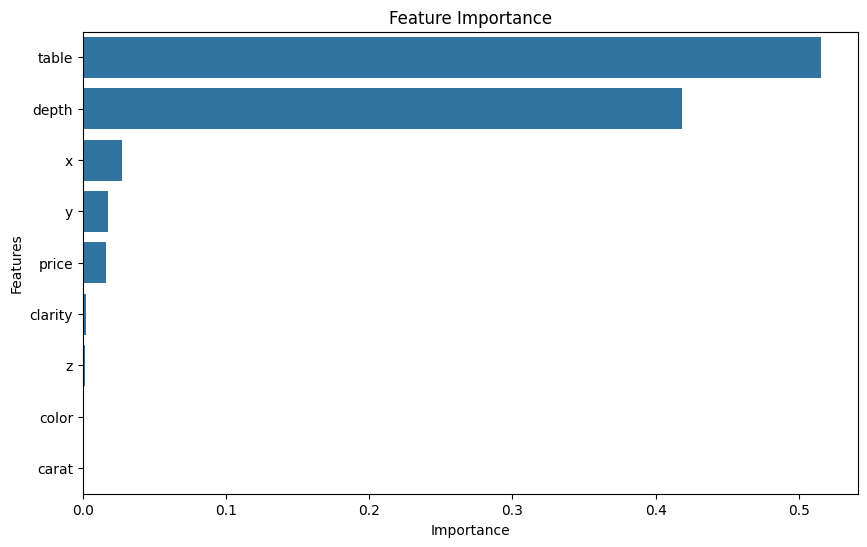

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# 가정: model과 X_train이 이미 정의되어 있고, 모델이 학습된 상태임
importances = model.feature_importances_
features = X.columns

# 특성 중요도를 데이터프레임으로 변환
importance_data = pd.DataFrame({'Features': features, 'Importance': importances})

# 데이터프레임을 중요도에 따라 정렬
importance_data = importance_data.sort_values(by='Importance', ascending=False)


# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x='Importance', y='Features', data=importance_data)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



### (2) 특성 선택과 엔지니어링 실습(1) - 특성의 중요도가 높은 특성 선택하기

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Seaborn 라이브러리를 사용해 데이터셋 로드
diamonds = sns.load_dataset("diamonds")

# LabelEncoder 인스턴스 생성
label_encoder_cut = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_clarity = LabelEncoder()

# 각 범주형 컬럼에 대해 레이블 인코딩 수행
diamonds['cut'] = label_encoder_cut.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder_color.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder_clarity.fit_transform(diamonds['clarity'])


# 입력 데이터 출력 데이터 나누기
X = diamonds.drop('cut', axis=1)  # 'cut'을 제외한 모든 특성 사용
y = diamonds['cut']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 의사결정트리를 사용한 모델 구축
model = DecisionTreeClassifier(max_depth=7, random_state=42)

# 모델 학습
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, random_state=42)

In [58]:
from sklearn.feature_selection import SelectFromModel

# 중요도가 높은 특성 선택
selector = SelectFromModel(model, prefit=True)
X_important_train = selector.transform(X_train)
X_important_test = selector.transform(X_test)

# 선택된 특성으로 모델 학습
model_important = DecisionTreeClassifier(max_depth=7, random_state=42)
model_important.fit(X_important_train, y_train)

# 정확도 평가
accuracy = model_important.score(X_important_test, y_test)
print(f"Reduced features model accuracy: {accuracy:.2f}")

Reduced features model accuracy: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### 사용 이점:
 - **성능 향상**: 불필요한 특성을 제거함으로써 모델이 더 중요한 정보에 집중할 수 있게 하여 성능이 향상될 수 있습니다.
 - **학습 시간 감소**: 특성의 수가 줄어들면, 모델 학습에 필요한 시간과 계산 비용이 감소합니다.
 - **과적합 방지**: 모델이 훈련 데이터에 과적합되는 것을 방지할 수 있습니다. 덜 중요한 특성을 제거함으로써 모델이 일반화 능력을 향상시킬 수 있습니다.

### 특성 엔지니어링 실습(3) - 새로운 특징 생성




In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

# Seaborn 라이브러리를 사용해 데이터셋 로드
diamonds = sns.load_dataset("diamonds")

# 새로운 특징 생성
# 특징 1 - 'x', 'y', 'z' 값을 이용하여 보석의 부피를 계산합니다.
# 활용: 보석의 가격이나 품질과 관련될 수 있습니다.
# 예를 들어, 부피가 큰 보석은 일반적으로 더 비싸고 품질이 높은 것으로 간주됩니다.
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# 특징 2 - 'y' 값을 'x' 값으로 나눈 값입니다. (aspect_ratio)
# 활용: 보석의 모양을 나타내는 지표로 사용될 수 있습니다. 예를 들어, aspect_ratio가 1에 가까운 경우 보석은 정사각형에 가깝고, aspect_ratio가 1보다 큰 경우 보석은 길쭉한 모양을 갖습니다.

# 특징 3 - 'z' 값을 'y' 값으로 나눈 값입니다. (depth_ratio)
# 활용: 보석의 비율을 나타내는 지표로 사용될 수 있습니다. 예를 들어, depth_ratio가 1에 가까운 경우 보석은 얇고, depth_ratio가 1보다 큰 경우 보석은 두껍습니다.

diamonds.loc[diamonds['x'] != 0, 'aspect_ratio'] = diamonds.loc[diamonds['x'] != 0, 'y'] / diamonds.loc[diamonds['x'] != 0, 'x']
diamonds.loc[diamonds['y'] != 0, 'depth_ratio'] = diamonds.loc[diamonds['y'] != 0, 'z'] / diamonds.loc[diamonds['y'] != 0, 'y']

# 0으로 나누는 경우를 방지하기 위해 남은 null 값을 0으로 대체
diamonds['aspect_ratio'] = diamonds['aspect_ratio'].fillna(0)
diamonds['depth_ratio'] = diamonds['depth_ratio'].fillna(0)

# 특징 4 - 'table' 값을 (('x' + 'y') / 2)로 나눈 값입니다.
# 활용: 보석의 컷 품질을 평가하는 지표로 사용될 수 있습니다.
# 일반적으로 table_ratio가 50%~60% 사이에 있는 보석은 컷 품질이 좋은 것으로 간주됩니다.
diamonds['table_ratio'] = diamonds['table'] / ((diamonds['x'] + diamonds['y']) / 2)

# 무한대 값 및 이상치 제거
diamonds = diamonds.replace([np.inf, -np.inf], np.nan).dropna()


In [60]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53933 entries, 0 to 53939
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   carat         53933 non-null  float64 
 1   cut           53933 non-null  category
 2   color         53933 non-null  category
 3   clarity       53933 non-null  category
 4   depth         53933 non-null  float64 
 5   table         53933 non-null  float64 
 6   price         53933 non-null  int64   
 7   x             53933 non-null  float64 
 8   y             53933 non-null  float64 
 9   z             53933 non-null  float64 
 10  volume        53933 non-null  float64 
 11  aspect_ratio  53933 non-null  float64 
 12  depth_ratio   53933 non-null  float64 
 13  table_ratio   53933 non-null  float64 
dtypes: category(3), float64(10), int64(1)
memory usage: 5.1 MB


In [61]:
# LabelEncoder 인스턴스 생성
label_encoder_cut = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_clarity = LabelEncoder()


# 각 범주형 컬럼에 대해 레이블 인코딩 수행
diamonds['cut'] = label_encoder_cut.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder_color.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder_clarity.fit_transform(diamonds['clarity'])

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53933 entries, 0 to 53939
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53933 non-null  float64
 1   cut           53933 non-null  int64  
 2   color         53933 non-null  int64  
 3   clarity       53933 non-null  int64  
 4   depth         53933 non-null  float64
 5   table         53933 non-null  float64
 6   price         53933 non-null  int64  
 7   x             53933 non-null  float64
 8   y             53933 non-null  float64
 9   z             53933 non-null  float64
 10  volume        53933 non-null  float64
 11  aspect_ratio  53933 non-null  float64
 12  depth_ratio   53933 non-null  float64
 13  table_ratio   53933 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 6.2 MB


In [62]:
diamonds.loc[ diamonds['aspect_ratio'].isnull(), : ]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,aspect_ratio,depth_ratio,table_ratio


In [63]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,aspect_ratio,depth_ratio,table_ratio
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030,1.007595,0.610553,13.871375
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.987147,0.601562,15.782665
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885,1.004938,0.567568,16.009852
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580,1.007143,0.621749,13.760380
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250,1.002304,0.632184,13.348677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,115.920000,1.001739,0.607639,9.904431
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,118.110175,1.010545,0.627826,9.615385
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,114.449728,1.003534,0.626761,10.582011
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,140.766120,0.995122,0.611111,9.453953


In [64]:
X = diamonds.drop('cut', axis=1) # 'cut'을 제외한 모든 특성 사용
y = diamonds['cut']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정트리 모델 구축
model = DecisionTreeClassifier(max_depth=7, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


▶ 하이퍼 파리미터 튜닝(Hyperparametre Tuning) 이해 <br>
   (1) 하이퍼 파리미터 튜닝(Hyperparametre Tuning) 용어 이해 <br>
   (2) 하이퍼 파라미터 튜닝 실습(1) <br>
   (3) 하이퍼 파라미터 튜닝 실습(2) <br>

### (1) 하이퍼 파리미터 튜닝(Hyperparametre Tuning) 용어 이해

하이퍼 파라미터(Hyperparameters)는 모델의 학습 과정이나 구조를 조절하는 파라미터로, 학습 전에 설정되며, 학습 과정에서는 변하지 않습니다.
이 파라미터들은 모델의 성능에 직접적인 영향을 미치며, 적절한 하이퍼 파라미터를 선택하는 것이 중요합니다. 대표적인 하이퍼 파라미터에는 **학습률(learning rate), 트리의 깊이, 배치 크기** 등이 있습니다.

하이퍼 파라미터 튜닝은 이러한 파라미터들의 최적의 조합을 찾는 과정으로, 보통 다음과 같은 방법들을 사용합니다
 - **그리드 탐색(Grid Search)** : 사전에 정의된 여러 하이퍼 파라미터의 조합을 시험하여 최적의 조합을 찾습니다.
 - **랜덤 탐색(Random Search)** : 하이퍼 파라미터의 범위를 지정하고, 그 범위 내에서 무작위로 조합을 선택하여 최적의 조합을 찾습니다.
 - **베이지안 최적화(Bayesian Optimization)** : 성능이 좋은 하이퍼 파라미터 조합을 찾을 확률을 최대화하는 방식으로 접근하여, 이전의 평가를 바탕으로 최적의 파라미터를 찾습니다.

### lightGBM 모델 활용

In [67]:
# 라이브러리 불러오기
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

# Seaborn 라이브러리를 사용해 데이터셋 로드
diamonds = sns.load_dataset("diamonds")

# LabelEncoder 인스턴스 생성  - LabelEncoder 클래스
# 범주형 변수를 숫자로 매핑하는 역할
label_encoder_cut = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_clarity = LabelEncoder()

# 각 범주형 컬럼에 대해 레이블 인코딩 수행
diamonds['cut'] = label_encoder_cut.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder_color.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder_clarity.fit_transform(diamonds['clarity'])

X = diamonds.drop('cut', axis=1)  # 'cut' 컬럼 제외한 모든 특성 사용
y = diamonds['cut']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LightGBM 모델 생성 및 학습
model = LGBMClassifier(max_depth=7, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 예측 및 정확도 계산
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score -3.521783
[LightGBM] [Info] Start training from score -2.403240
[LightGBM] [Info] Start training from score -0.916395
[LightGBM] [Info] Start training from score -1.365380
[LightGBM] [Info] Start training from score -1.492603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

### (2) 하이퍼 파라미터 튜닝 실습(1)

### 그리드 서치는 무엇인가요?
 - 그리드 서치(Grid Search)는 머신러닝 모델의 하이퍼파라미터를 튜닝하기 위한 방법 중 하나입니다. 하이퍼파라미터는 모델의 구조나 학습 과정을 제어하는 변수로, 모델의 성능에 큰 영향을 미칩니다.

그리드 서치는 미리 정의된 하이퍼파라미터 값의 조합을 전부 평가하여 가장 좋은 성능을 내는 하이퍼파라미터 조합을 찾습니다.
이 과정은 다음과 같이 진행됩니다.
 - 01. 탐색할 하이퍼파라미터와 각 하이퍼파라미터의 후보 값들을 지정합니다.
 - 02. 가능한 모든 하이퍼파라미터 조합을 계산합니다.
 - 03. 각 하이퍼파라미터 조합에 대해 교차 검증(cross-validation)을 수행하여 모델의 성능을 평가합니다.
 - 04. 가장 좋은 성능을 내는 하이퍼파라미터 조합을 선택합니다.


### 장점과 단점
 - 장점 : 단순하고 이해하고 쉽습니다.
 - 단점 : 탐색 공간(하이퍼파라미터 조합의 수)이 커질수록 계산 비용이 기하급수적으로 증가하는 단점이 있음.

이를 해결하기 위해 랜덤 서치(Random Search), 베이지안 최적화(Bayesian Optimization)등의 방법이 제안.
그리드 서치는 scikit-learn 라이브러리의 GridSearchCV 클래스를 사용하여 간편하게 구현할 수 있습니다.

In [68]:
# 하이퍼 파라미터 튜닝 - 그리드 서치
#

# 라이브러리 불러오기
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

# Seaborn 라이브러리를 사용해 데이터셋 로드
diamonds = sns.load_dataset("diamonds")

# LabelEncoder 인스턴스 생성
label_encoder_cut = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_clarity = LabelEncoder()

# 각 범주형 컬럼에 대해 레이블 인코딩 수행
diamonds['cut'] = label_encoder_cut.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder_color.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder_clarity.fit_transform(diamonds['clarity'])

X = diamonds.drop('cut', axis=1)  # 'cut' 컬럼 제외한 모든 특성 사용
y = diamonds['cut']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# 그리드 서치에 사용할 하이퍼 파라미터 그리드 설정
# num_leaves : 모델에서 트리가 가질 수 있는 최대 잎(리프 노드)의 수
# max_depth : 트리의 깊이. 깊이가 깊을수록 복잡한 트리를 만들 수 있지만, 너무 깊으면 과적합을 일으킬 수 있습니다.
# learning_rate : 학습을 진행하는 과정에서 각 스텝마다 적용하는 학습 속도를 의미.
#  일반적으로 값이 작을수록 학습이 느리고 안정적이며, 큰 값은 학습을 빠르게 하지만 결과적으로 최적점을 지나칠 수도 있습니다.

param_grid = {
    'num_leaves': [31, 61, 91],  # 잎의 수
    'max_depth': [10, 20, -1],  # 최대 깊이
    'learning_rate': [0.01, 0.05, 0.1]  # 학습률
}

# 그리드 서치 수행
grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid, cv=3,
                                     scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)


# 최적의 하이퍼 파라미터 출력
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 최적의 모델로 테스트 데이터 세트 평가
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f'최적의 파라미터 Test 정확도: {accuracy:.2f}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score -3.521783
[LightGBM] [Info] Start training from score -2.403240
[LightGBM] [Info] Start training from score -0.916395
[LightGBM] [Info] Start training from score -1.365380
[LightGBM] [Info] Start training from score -1.492603
Best parameters: {'learning_rate': 0.1, 'max_depth': 20, 'num_leaves': 61}
Best cross-validation score: 0.80
최적의 파라미터 Test 정확도: 0.80


### (3) 하이퍼 파라미터 튜닝 실습(2) - 베이지안 최적화

### 베이지안 최적화는 무엇인가요?
베이지안 최적화(Bayesian Optimization)는 머신러닝 모델의 하이퍼파라미터를 효율적으로 튜닝하기 위한 기법입니다.
복잡하고 시간이 많이 걸리는 실험을 최소한으로 하면서 최적의 결과를 찾아내는 기법입니다.
특히 하이퍼파라미터 공간이 크고 목적 함수의 평가가 계산 비용이 많이 드는 경우에 유용합니다.

좀 더 쉽게 설명하면,
베이지안 최적화는 블랙박스 함수의 최적해를 찾는 기법입니다. 여기서 블랙박스 함수란 입력값과 출력값의 관계를 수식으로 표현하기 어려운 복잡한 함수를 말합니다. 예를 들어 머신러닝 모델의 하이퍼파라미터에 따른 모델 성능이 그렇습니다.
이런 블랙박스 함수의 최적해를 찾는 과정에서 베이지안 최적화는 다음과 같이 진행됩니다.

### 주요 단계는 다음과 같습니다:

1. 대리 모델 구축: 이는 문제를 간단히 표현하는 가상의 모델을 만드는 과정입니다. 주로 가우시안 프로세스라는 통계적 기법을 사용하여, 실제 문제의 예상 결과를 근사하게 나타냅니다. 실제 실험을 하지 않고도 어떤 입력값들이 어떤 결과를 낼지 예측할 수 있게 해 줍니다.
2. 획득 함수 최적화: 이 함수는 대리 모델을 사용해 어디를 다음으로 시험해볼지 결정합니다. 즉, 최적의 결과를 얻을 가능성이 높은 '후보점'을 찾아내는 역할을 합니다. 여기서의 목표는 아직 시도하지 않은 영역 중에서 가장 유망한 곳을 찾는 것입니다.
3. 새로운 후보점 평가: 위에서 찾은 후보점을 실제로 실험해봅니다. 이 단계에서는 실제 데이터를 수집하게 되며, 이 데이터는 모델이 정확도를 높이는 데 사용됩니다.
4. 대리 모델 업데이트: 새롭게 얻은 실험 결과를 가지고 대리 모델을 다시 업데이트합니다. 이는 모델이 더 정확해지도록 돕습니다.
5. 반복: 위의 과정을 계속 반복하면서, 계산 시간이나 예산 등의 자원이 허용하는 한 최적의 해를 찾아갑니다.

이런 식으로 반복적으로 대리 모델을 업데이트하면서 점진적으로 최적해를 탐색해 나갑니다.

간단히 말해, 베이지안 최적화는 많은 실험 없이도 좋은 결과를 얻기 위해, 가상 모델을 지속적으로 개선해가며 실험을 설계하는 방법입니다. 이 방법은 자원을 아끼면서도 가능한 최선의 결정을 내리기 위해 사용됩니다.


### 베이지안 최적화 도구
 - Scikit-Optimize (skopt) : Python 기반의 라이브러리로, 간단하고 효율적인 베이지안 최적화를 제공
 - Spearmint  : Python과 MongoDB를 사용하여 구현되어 있으며, 대규모 실험을 관리하는 데 유용
 - Hyperopt : Hyperopt는 Python 라이브러리로, 복잡한 검색 공간을 가진 최적화 문제에 적합합니다. 특히 Tree of Parzen Estimators (TPE) 같은 효율적인 베이지안 알고리즘을 사용하여 파라미터 최적화를 수행
 - Bayesian Optimization (bayes_opt) : Python 라이브러리로, 베이지안 최적화 프로세스를 간소화하고, 강력하고 유연한 도구를 제공합니다. 사용하기 쉬운 API를 가지고 있어, 사용자가 빠르게 최적화 작업을 설정하고 실행
 - BoTorch : Facebook AI Research에서 개발한 라이브러리로, PyTorch를 기반으로 하고 있습니다. BoTorch는 현대적인 최적화 기술과 강력한 자동 미분 엔진을 결합하여, 매우 유연하고 확장 가능한 베이지안 최적화 프레임워크를 제공

- 설치
```
pip install scikit-optimize
```

In [74]:
# 라이브러리 설치
!pip install scikit-optimize

In [75]:
# 라이브러리 불러오기
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import seaborn as sns

# Seaborn 라이브러리를 사용해 데이터셋 로드
diamonds = sns.load_dataset("diamonds")

# LabelEncoder 인스턴스 생성
label_encoder_cut = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_clarity = LabelEncoder()

# 각 범주형 컬럼에 대해 레이블 인코딩 수행
diamonds['cut'] = label_encoder_cut.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder_color.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder_clarity.fit_transform(diamonds['clarity'])

X = diamonds.drop('cut', axis=1)  # 'cut' 컬럼 제외한 모든 특성 사용
y = diamonds['cut']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 베이지안 최적화를 위한 검색 공간 설정
search_spaces = {
 'num_leaves': Integer(31, 100),  # 잎의 수 범위 (31에서 100사이)
 'max_depth': Integer(10, 50),    # 최대 깊이 범위. 너무 깊을 경우, 과적합 가능성 있음.
 'learning_rate': Real(0.01, 0.5, prior='log-uniform')  # 로그-유니폼 분포에서 학습률 검색 - 낮은 값을 좀 더 세밀하게 탐색
}


# BayesSearchCV 인스턴스 생성
# GridSearchCV와 유사하지만, 내부적으로는 베이지안 최적화를 사용하여 파라미터 공간을 더 효율적으로 탐색
opt = BayesSearchCV(
    LGBMClassifier(random_state=42),
    search_spaces,
    n_iter=32,  # 반복 횟수. 최적화 과정에서 수행될 평가(반복) 횟수. (32번의 다른 하이퍼 파라미터 조합)
    cv=3,       # 교차 검증 분할 수
    n_jobs=-1,  # 사용할 CPU 코어 수 -1 : 가능한 모든 CPU 코어 사용.(계산 속도 향상)
    scoring='accuracy',  # 성능 평가 기준
    verbose=1
)

# 최적화 실행
opt.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print("Best parameters:", opt.best_params_)
print("Best cross-validation score: {:.2f}".format(opt.best_score_))

# 최적의 모델로 테스트 데이터 세트 평가
best_model = opt.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f'최적의 파라미터 Test 정확도: {accuracy:.2f}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
# 2개선택
# 특징 여러개 선택
# 특징 생성
# 하이퍼 파라미터 튜닝 - 그리드 서치, 베이지안 최적화
